In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
!pip install langdetect
import langdetect
import matplotlib.pyplot as plt
import seaborn as sns

Mounted at /content/drive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 15.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=abc3c11eb202aa02851112301a96bc4769f3e166ce25535367d347687ac301c3
  Stored in directory: /root/.cache/pip/wheels/13/c7/b0/79f66658626032e78fc1a83103690ef6797d551cb22e56e734
Successfully built langdetect


In [ ]:
%cd /content/drive/My Drive/nlp/
colnames=["label","text"]
df =pd.read_csv("fulltrain.csv", names=colnames,header=None)
df.head()

,label,text
0,1,"A little less than a decade ago, hockey fans w..."
1,1,The writers of the HBO series The Sopranos too...
2,1,Despite claims from the TV news outlet to offe...
3,1,After receiving 'subpar' service and experienc...
4,1,After watching his beloved Seattle Mariners pr...


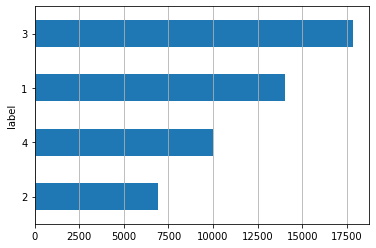

In [ ]:
fig, ax = plt.subplots()
df["label"].reset_index().groupby("label").count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()

In [ ]:
import nltk,re
nltk.download('all')
lst_stopwords = nltk.corpus.stopwords.words("english")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

In [ ]:
def utils_preprocess_text(text,lst_stopwords):
    
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    lst_text = text.split()
  
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
    lem = nltk.stem.wordnet.WordNetLemmatizer()
    lst_text = [lem.lemmatize(word) for word in lst_text]
            
    text = " ".join(lst_text)
    return text

In [ ]:
df["preprocessed"] = df["text"].apply(lambda x: utils_preprocess_text(x,lst_stopwords))

KeyboardInterrupt: ignored

In [ ]:
df['word_count'] = df["text"].apply(lambda x: len(str(x).split(" ")))
df['char_count'] = df["text"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
df['sentence_count'] = df["text"].apply(lambda x: len(str(x).split(".")))
df['avg_word_length'] = df['char_count'] / df['word_count']
df['avg_sentence_length'] = df['word_count'] / df['sentence_count']
df["length"]=df["text"].apply(lambda x : len(x))
df.head()

,label,text,preprocessed,word_count,char_count,sentence_count,avg_word_length,avg_sentence_length,sentiment,length
0,1,"A little less than a decade ago, hockey fans w...",little le decade ago hockey fan blessed slate ...,147,727,9,4.945578,16.333333,0.193722,873
1,1,The writers of the HBO series The Sopranos too...,writer hbo series soprano took another daring ...,123,593,5,4.821138,24.600000,0.087879,715
2,1,Despite claims from the TV news outlet to offe...,despite claim tv news outlet offer nonstop new...,706,3738,40,5.294618,17.650000,0.075720,4443
3,1,After receiving 'subpar' service and experienc...,receiving subpar service experiencing unusuall...,706,3208,29,4.543909,24.344828,0.121929,3913
4,1,After watching his beloved Seattle Mariners pr...,watching beloved seattle mariner prevail san d...,174,885,6,5.086207,29.000000,0.157817,1058


In [ ]:
import plotly.express as px
px.box(df,x="label",y="avg_word_length")

In [ ]:
from textblob import TextBlob
df["sentiment"] = df["text"].apply(lambda x: 
                   TextBlob(x).sentiment.polarity)

<AxesSubplot:xlabel='sentiment'>

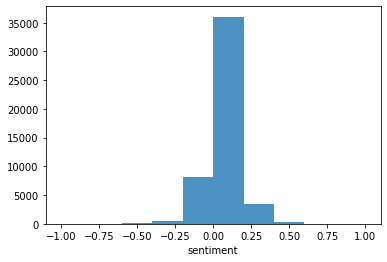

In [ ]:
sns.distplot(df["sentiment"], hist=True, kde=False, 
              bins=10, hist_kws={"alpha":0.8})

In [ ]:
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

def tag_part_of_speech(text):
    text_splited = text.split(' ')
    text_splited = [''.join(c for c in s if c not in string.punctuation) for s in text_splited]
    text_splited = [s for s in text_splited if s]
    pos_list = pos_tag(text_splited)
    noun_count = len([w for w in pos_list if w[1] in ('NN','NNP','NNPS','NNS')])
    adjective_count = len([w for w in pos_list if w[1] in ('JJ','JJR','JJS')])
    verb_count = len([w for w in pos_list if w[1] in ('VB','VBD','VBG','VBN','VBP','VBZ')])
    return[noun_count, adjective_count, verb_count]

In [ ]:

    df['nouns'], df['adjectives'], df['verbs'] = zip(*df['text'].apply(
        lambda comment: tag_part_of_speech(comment)))
    df['nouns_vs_length'] = df['nouns'] / df['length']
    df['adjectives_vs_length'] = df['adjectives'] / df['length']
    df['verbs_vs_length'] = df['verbs'] /df['length']
    df['nouns_vs_words'] = df['nouns'] / df['word_count']
    df['adjectives_vs_words'] = df['adjectives'] / df['word_count']
    df['verbs_vs_words'] = df['verbs'] / df['word_count']

In [ ]:
df['num_exclamation_marks_per_sentence'] = df['text'].apply(lambda comment: comment.count('!'))/df["sentence_count"]
df['num_question_marks_per_sentence'] = df['text'].apply(lambda comment: comment.count('?'))/df["sentence_count"]
df['num_punctuation_per_sentence'] = df['text'].apply(lambda comment: sum(comment.count(w) for w in '.,;:'))/df["sentence_count"]
df['num_symbols_per_sentence'] = df['text'].apply(lambda comment: sum(comment.count(w) for w in '*&$%'))/df["sentence_count"]
df['num_unique_words_per_sentence'] = df['text'].apply(lambda comment: len(set(w for w in comment.split())))/df["sentence_count"]
df['words_vs_unique'] = df['num_unique_words'] / df['word_count']
df['num_smiley_per_sentence'] = df['text'].apply(lambda comment: sum(comment.count(w) for w in (':-)', ':)', ';-)', ';)')))/df["sentence_count"]
df['num_sad_per_sentence'] = df['text'].apply(lambda comment: sum(comment.count(w) for w in (':-<', ':()', ';-()', ';(')))/df["sentence_count"]


In [ ]:
px.box(df,x="label",y='num_smiley_per_sentence')

In [ ]:
px.box(df,x="label",y='num_punctuation_per_sentence')

In [ ]:
px.box(df,x="label",y='num_exclamation_marks_per_sentence')